# Atmospheric Dynamic

## Exercise 1
An air parcel at $30 N$ moves northward conserving absolute vorticity. If its initial relative vorticity is $5 e^{−5} s^{−1}$ , what is its relative vorticity upon reaching $90 N$?

For horizontal, barotropic, incompressible flow, the absolute vorticity (planetary + relative) is conserved following the motion. 

In [7]:
import math
earth_omega = (2.0 * math.pi) / 86400.0
lat1 = 30.0
relative_vorticity_1 = 5e-5
lat2 = 90.0
planetary_vorticity_1 = 2.0 * earth_omega * math.sin(math.radians(lat1))
planetary_vorticity_2 = 2.0 * earth_omega * math.sin(math.radians(lat2))
relative_vorticiy_2 = (planetary_vorticity_1 + relative_vorticity_1 - planetary_vorticity_2)
print('Final relative vorticity : ', relative_vorticiy_2)

Final relative vorticity :  -2.2722052166430413e-05


## Exercise 2

An air column at $60 N$ with $\xi = 0$ initially stretches from the surface to a fixed tropopause at $10 km$. If the air column moves until it is over a mountain barrier $2.5 km$ high at $45 N$, what are its absolute vorticity and relative vorticity as it passes the mountain top, assuming that the flow satisfies the barotropic potential vorticity equation?

Barotropic, incompressible flow, the absolute vorticity over the scale height is conserved following the motion.

In [8]:
import math
earth_omega = (2.0 * math.pi) / 86400.0
lat1 = 60.0 # degree
relative_vorticity_1 = 0.0
height_1 = 10 # km
lat2 = 45.0 #degree
height_2 = 12.5 # km
planetary_vorticity_1 = 2.0 * earth_omega * math.sin(math.radians(lat1))
planetary_vorticity_2 = 2.0 * earth_omega * math.sin(math.radians(lat2))
relative_vorticiy_2 = (((planetary_vorticity_1 +
                       relative_vorticity_1) / height_1) * height_2 - 
                       planetary_vorticity_2)
print('Final relative vorticity : ', relative_vorticiy_2)

Final relative vorticity :  5.460334902129516e-05


## Exercise 3

Integrate $\rho c H \frac{dT}{dt} = N - \lambda T$ for $N = N_\nu (sin \nu_1 t + sin \nu_2 t)$, where $\nu = 2\pi/180 days^{−1}$, $\nu_2 = 2 \pi / 20 days^{−1}$ and $N_\nu = 50 W/m^2$. You may use $T = 0K$ as initial condition. Use a time step of $dt = 86400 s = 1 day$. Plot the solution and the forcing for 2 years.

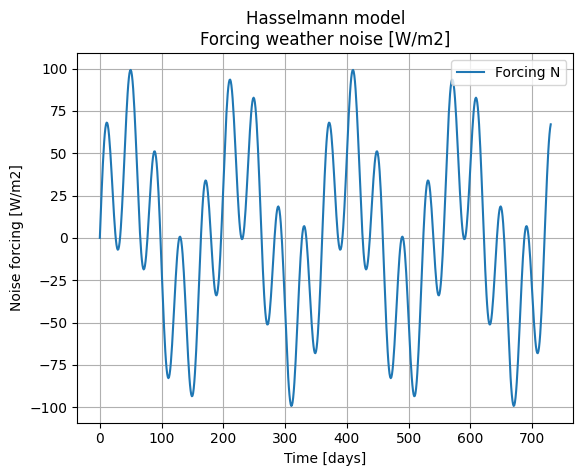

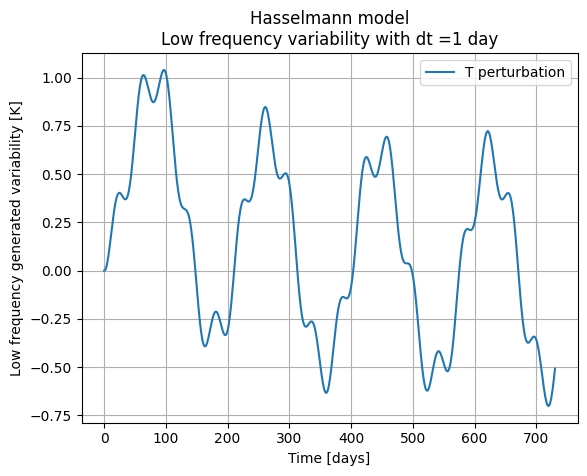

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Data section

ρ    = 1000.0            # Water density, kg/m3
cwat = 4186.0            # Specific heat of wateer J/kg
H    = 50.0              # Slab ocean depth
λ    = 15.0              # Damping coefficient, W/m2/K
Nν   = 50.0              # W/m2
ν1   = (2.0*np.pi)/180.0 # days-1
ν2   = np.pi/20.0        # days-1
tfac = 86400.0           # seconds per day, to get it in SI

c1 = 1.0/(ρ * cwat * H)
# Eq 289
# ρcH dT/dt = N − λT

def N(t):
    return Nν*(np.sin(ν1*t)+np.sin(ν2*t))

T = 0.0 # Temperature perturbation above steady state (290 K usually)

dt = 1.0                           # days
days_per_year = 365.0
final_time = 2.0 * days_per_year

# Arrays for plotting
time = np.zeros(int(final_time)+1)
perturbation = np.empty_like(time)
forcing = np.empty_like(time)

i = 0
t = 0.0
while t < final_time:
    time[i] = t
    forcing[i] = N(t)
    perturbation[i] = T
    T = T + c1 * ( forcing[i] - λ * T ) * dt*tfac
    t = t + dt
    i = i + 1

time[i] = t
forcing[i] = N(t)
perturbation[i] = T

plt.plot(time,forcing,label='Forcing N')
plt.xlabel('Time [days]')
plt.ylabel('Noise forcing [W/m2]')
plt.title('Hasselmann model\nForcing weather noise [W/m2]')
plt.legend( )
plt.grid(True)
plt.show(block=False)
plt.figure( )
plt.plot(time,perturbation,label='T perturbation')
plt.xlabel('Time [days]')
plt.ylabel('Low frequency generated variability [K]')
plt.title('Hasselmann model\nLow frequency variability with dt ='+
          repr(int(dt))+' day')
plt.legend( )
plt.grid(True)

## Exercise 4

Write a code that uses

$u = u_g - \left[ u_g \cos(\gamma z) + v_g \sin(\gamma z) \right] e^{-\gamma z}$

$v = v_g - \left[ u_g \sin(\gamma z) - v_g \cos(\gamma z) \right] e^{-\gamma z}$

plot the solution as as phase space diagram (u,v). Also, solve the original equations

$K_m \frac{\partial^2 u}{\partial z^2} + f(v-v_g) = 0$

$K_m \frac{\partial^2 v}{\partial z^2} + f(u-u_g) = 0$

numerically by keeping the local time derivative in the Ekman equations:

$\frac{\partial u}{\partial t} = K_m \frac{\partial^2 u}{\partial z^2} + f(v-v_g)$

$\frac{\partial v}{\partial t} = K_m \frac{\partial^2 v}{\partial z^2} - f(u-u_g)$

For both analysical and numerical solutions use $K_m = 5 m^2 s^{−1}$ , the coriolis parameter at $45 N$, $u_g = 10 m s^{−1}$ , $v_g = 0$. The vertical domain should be $[0m, 74m , 3000 m]$. Use as initial condition $u = u_g$, $v = 0$. Compare the numerical stationary with the analytical solution. How long does it take for the solution to become approximately stationary?

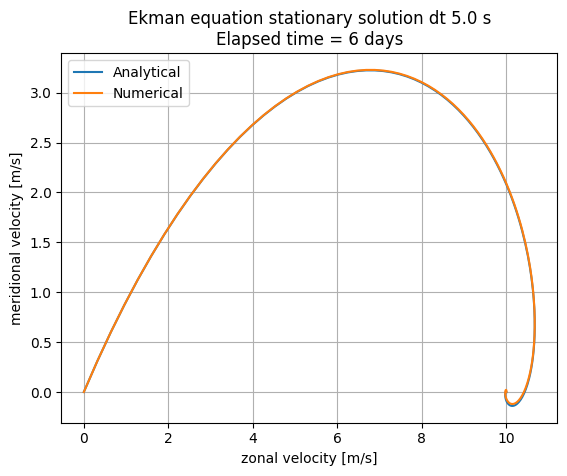

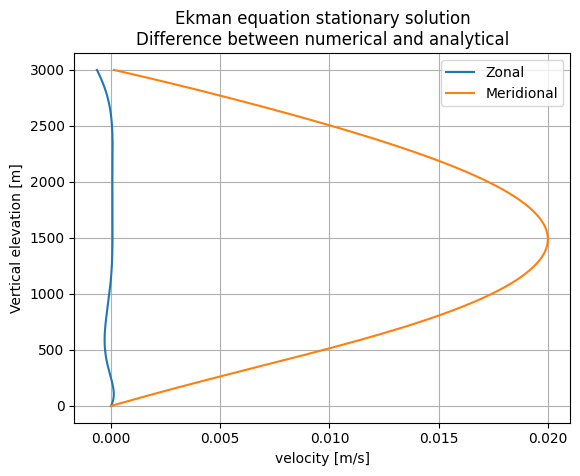

In [12]:
import numpy as np
import matplotlib.pyplot as plt

ug = 10.0
vg = 0.0

omeg = 7.2921159e-5
fo = 2.0 * omeg * np.sin(np.deg2rad(45.0))
km = 5.0
agam = np.sqrt(fo/(2.0*km))

aday = 86400.0
tmax = 6.0*aday
dz = 10.0
dt = 5.0
z0 = 0.0
z1 = 3000.0
c = km*dt/(dz*dz)
nz = int((z1-z0)/dz) + 1

z = np.linspace(z0,z1,nz)
u = np.zeros_like(z)
v = np.zeros_like(z)
up = np.zeros_like(u)
vp = np.zeros_like(v)

ua = ug - (ug*np.cos(agam*z) + vg*np.sin(agam*z)) * np.exp(-agam*z)
va = vg + (ug*np.sin(agam*z) - vg*np.cos(agam*z)) * np.exp(-agam*z)
plt.plot(ua,va,label='Analytical')

u[0] = 0.0
v[0] = 0.0
u[1:nz] = ug
v[1:nz] = vg
up[:] = u[:]
vp[:] = v[:]

t = 0.0
while t < tmax:
    for k in range(1,nz-1):
        up[k] = u[k] + c*(u[k+1]-2.0*u[k]+u[k-1]) + dt*fo*(v[k]-vg)
        vp[k] = v[k] + c*(v[k+1]-2.0*v[k]+v[k-1]) - dt*fo*(u[k]-ug)
    u[:] = up[:]
    v[:] = vp[:]
    t = t + dt

plt.plot(u,v,label='Numerical')
plt.xlabel('zonal velocity [m/s]')
plt.ylabel('meridional velocity [m/s]')
plt.title('Ekman equation stationary solution dt '+repr(dt)+' s\n'+
          'Elapsed time = '+repr(int(tmax/aday))+' days')
plt.legend( )
plt.grid(True)
plt.show( )
plt.plot(u-ua,z,label='Zonal')
plt.plot(v-va,z,label='Meridional')
plt.xlabel('velocity [m/s]')
plt.ylabel('Vertical elevation [m]')
plt.title('Ekman equation stationary solution\n'+
          'Difference between numerical and analytical')
plt.legend( )
plt.grid(True)
plt.show( )

## Exercise 5

Plot the solution of the Lorenz System.

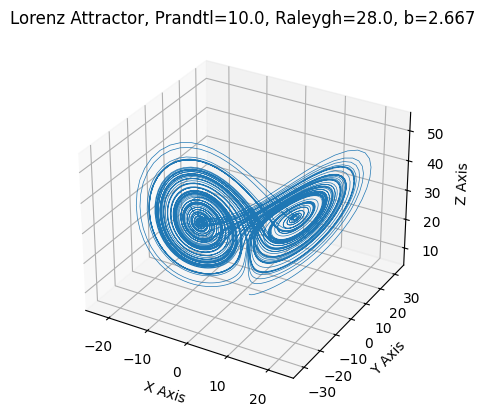

In [14]:
import matplotlib.pyplot as plt
import numpy as np
#
# p is Prandtl number  : kinetic viscosity over thermal diffusion coefficient
# r is Rayleigh number : dimensionless measure of the temperature difference
#                        between the bottom and top of the fluid
# b is the ratio between the vertical height of the fluid layer to the
# horizontal size of the convection rolls
#
# For b = 8/3, the convection begins for the smallest value of the Rayleigh
# number, that is for the smallest value of the temperature difference δT
# This value is usually chosen to study the Lorenz model
# p is then chosen for the particular fluid under study (p=10 is cold water)
#
p = 10.0
b = 2.667 # 8.0/3.0
r = 28.0

def lorenz(x, dt, sigma=p, beta=b, rho=r):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    p, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    return np.array([dt * (sigma * (x[1] - x[0])),
                     dt * (x[0] * (rho - x[2]) - x[1]),
                     dt * (x[0] * x[1] - beta * x[2])])

dt = 0.01
num_steps = 10000
p1 = np.zeros((num_steps+1,3))     # Need one more for the initial values
p1[0] = np.array((0.0, 1.0, 1.0))  # Set initial values

# Plot
ax = plt.figure().add_subplot(projection='3d')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))
ax.set_title("Lorenz Attractor, Prandtl="+repr(p)+
             ", Raleygh="+repr(r)+", b="+repr(b))
for i in range(num_steps):
    p1[i+1] = p1[i] + lorenz(p1[i],dt)
ax.plot(*p1.T, lw=0.5, label='$x=0.0,y=1.0,z=1.0$')
plt.show( )